# LR(0) анализатор
Наиболее распространенный тип восходящих синтаксических анализаторов
на сегодняшний день основан на концепции, называющейся LR(k)-анализом; L
здесь означает сканирование входного потока слева направо, R — построение
правого порождения в обратном порядке, а k — количество предпросматриваемых
символов входного потока, необходимое для принятия решения.

LR-анализаторы управляются таблицами. Грамматика, для которой можно построить таблицу
синтаксического анализа с использованием одного из методов из этого и сле-
дующего разделов, называется LR-грамматикой. Интуитивно, чтобы грамматика
была LR-грамматикой, достаточно, чтобы синтаксический анализатор, работаю-
щий слева направо методом переноса/свертки, был способен распознавать основы
правосентенциальных форм при их появлении на вершине стека.

Данная реализация выполнена в соответствии с учебником Альфред В. Ахо, Моника С. Лам, Рави Сети, Джеффри Д. Ульман
"Компиляторы: принципы, технологии и инструментарий. 2-е издание." В книге анализатор называется simple LR - SLR.

In [48]:
from IPython.display import Image
from importlib import reload
import formlang.slr as slr
import formlang.slr_orig as slr_orig
import graphics

Грамматика задаётся в виде конструкции языка Python3.

Расширенная грамматика:
0: E' -> E
1:  E -> T
2:  E -> E + T
3:  T -> T * F
4:  T -> F
5:  F -> ( E )
6:  F -> id

Таблица синтаксического анализа для грамматики выражений:
┌───────────┬───────────────────────────────────────────────────────────────────────┬───────────────────────────────────┐
│           │                                ACTION                                 │               GOTO                │
│ СОСТОЯНИE ├───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┤
│           │     +     │     *     │     (     │     id    │     )     │     $     │     F     │     T     │     E     │ 
├───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│     0     │           │           │     s3    │     s5    │           │           │     2     │     4     │     1     │ 
│     1     │     s6    │           │           │           │           │    acc    │        

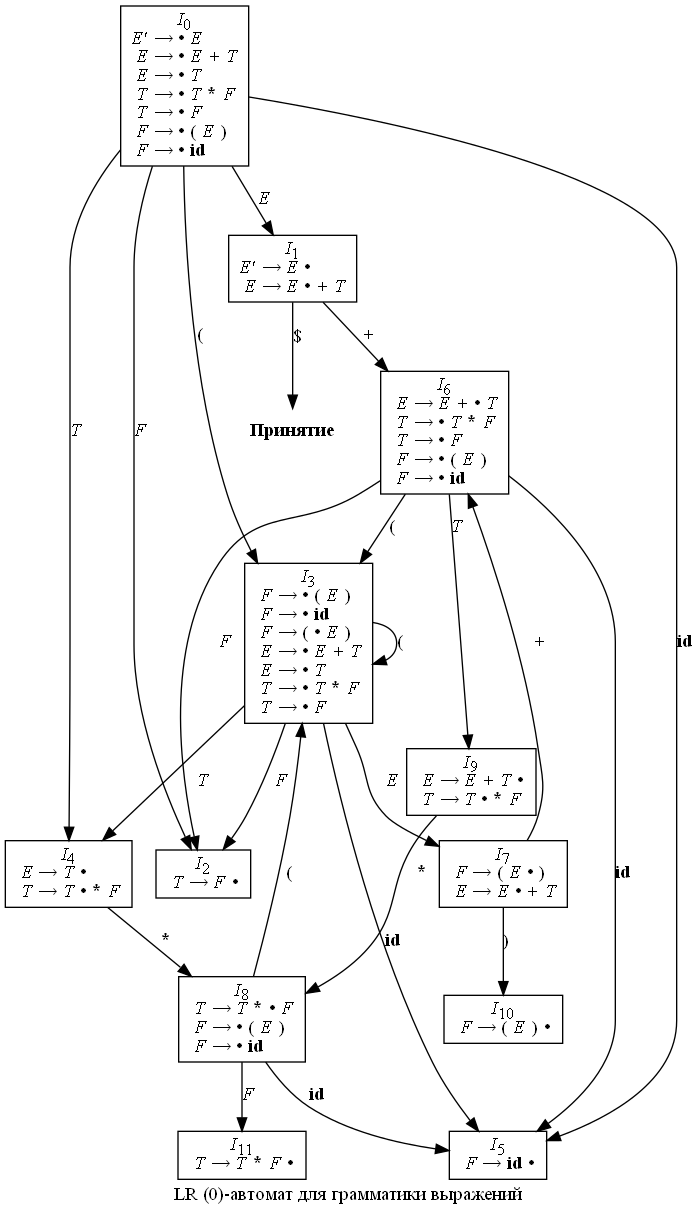

In [49]:
reload(slr)
grammar = {
    'E': {( 'E', '+', 'T' ), ( 'T', )},
    'T': {( 'T', '*', 'F' ), ( 'F', )},
    'F': {( '(', 'E', ')' ), ( 'id', )},
}
slr_parser = slr.SLRParser(grammar)
print('Расширенная грамматика:')
slr_parser.print_grammar()
print()
print('Таблица синтаксического анализа для грамматики выражений:')
slr_parser.print_parse_table()
results = slr_parser.LR_parser("id + id * id")
print('Таблица действий LR-анализатора:')
slr_parser.print_LR_parser(results)
print('LR (0)-автомат для грамматики выражений:')
Image(slr_parser.generate_automaton())